In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [2]:
df=pd.read_csv('Fraud_check.csv')

In [3]:
df.shape

(600, 6)

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [14]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [38]:
def sales(i) :
    if i <= 30000 :
        i='Risky'
    else:
        i='Good'
    return i

In [17]:
df['Taxable.Income']=df['Taxable.Income'].apply(sales)

In [18]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [20]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income     object
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [21]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [23]:
print('Undergrad')
print(df.Undergrad.value_counts())
print('-----------------------------------------')
print('Marital.Status')
print(df['Marital.Status'].value_counts())
print('-----------------------------------------')
print('Taxable.Income')
print(df['Taxable.Income'].value_counts())
print('-----------------------------------------')
print('Urban')
print(df['Urban'].value_counts())

Undergrad
YES    312
NO     288
Name: Undergrad, dtype: int64
-----------------------------------------
Marital.Status
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
-----------------------------------------
Taxable.Income
Good     476
Risky    124
Name: Taxable.Income, dtype: int64
-----------------------------------------
Urban
YES    302
NO     298
Name: Urban, dtype: int64


Undergrad


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


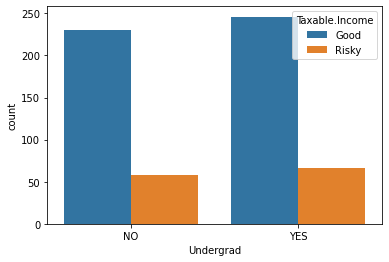

Undergrad  Taxable.Income
NO         Good              230
           Risky              58
YES        Good              246
           Risky              66
Name: Taxable.Income, dtype: int64
-----------------------------------------
Marital.Status


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


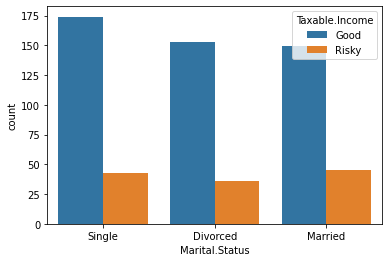

Marital.Status  Taxable.Income
Divorced        Good              153
                Risky              36
Married         Good              149
                Risky              45
Single          Good              174
                Risky              43
Name: Taxable.Income, dtype: int64
-----------------------------------------
Urban


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


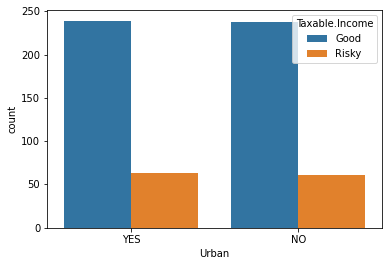

Urban  Taxable.Income
NO     Good              237
       Risky              61
YES    Good              239
       Risky              63
Name: Taxable.Income, dtype: int64


In [33]:
print('Undergrad')
sns.countplot('Undergrad',hue='Taxable.Income' ,data=df)
plt.show()
print(df.groupby('Undergrad')['Taxable.Income'].value_counts())
print('-----------------------------------------')
print('Marital.Status')
sns.countplot('Marital.Status',hue='Taxable.Income' ,data=df)
plt.show()
print(df.groupby('Marital.Status')['Taxable.Income'].value_counts())
print('-----------------------------------------')
print('Urban')
sns.countplot('Urban',hue='Taxable.Income' ,data=df)
plt.show()
print(df.groupby('Urban')['Taxable.Income'].value_counts())

In [35]:

cat=[i for i in df.columns if df[i].dtype=='object']
print(cat)
num=[i for i in df.columns if df[i].dtype=='int64' or df[i].dtype==  'float64']
print(num)

['Undergrad', 'Marital.Status', 'Taxable.Income', 'Urban']
['City.Population', 'Work.Experience']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


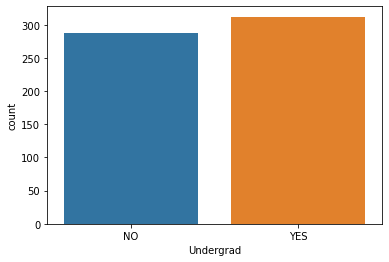

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


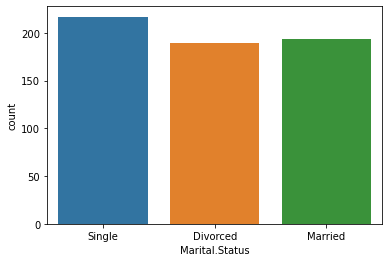

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


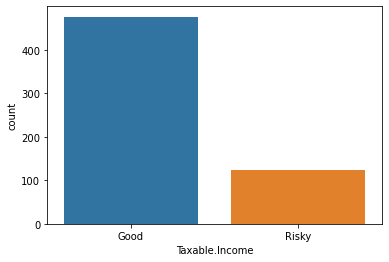

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


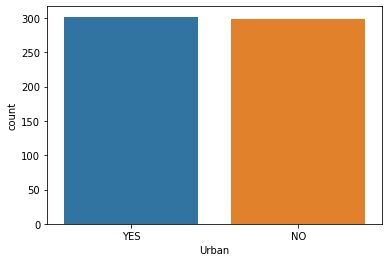

In [37]:
for i in cat:
    sns.countplot(df[i])
    plt.show()

In [39]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


<AxesSubplot:>

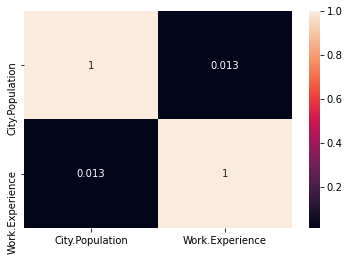

In [40]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])

__Applied Standard scaler but It haven't produce any change in accuracy of model.__

In [42]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [44]:
x=df.iloc[:,[0,1,3,4,5]]
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [45]:
y=df['Taxable.Income']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [46]:
y.value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

xtrain, xtest , ytrain , ytest = train_test_split(x,y, test_size=0.2,random_state=8)

# Hyperparameter Tuning

In [108]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred)

0.6416666666666667

In [113]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,19):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth,random_state=0)
    model.fit(xtrain, ytrain)
    train_accuracy.append(model.score(xtrain, ytrain))
    test_accuracy.append(model.score(xtest, ytest))
    y_pred=model.predict(xtest)
    print(max_depth)
    print('___________________________')
    print(pd.crosstab(ytest,y_pred))
    print('****************************')

1
___________________________
col_0            0
Taxable.Income    
0               98
1               22
****************************
2
___________________________
col_0            0
Taxable.Income    
0               98
1               22
****************************
3
___________________________
col_0            0
Taxable.Income    
0               98
1               22
****************************
4
___________________________
col_0            0
Taxable.Income    
0               98
1               22
****************************
5
___________________________
col_0            0  1
Taxable.Income       
0               96  2
1               22  0
****************************
6
___________________________
col_0            0  1
Taxable.Income       
0               90  8
1               22  0
****************************
7
___________________________
col_0            0  1
Taxable.Income       
0               90  8
1               22  0
****************************
8
_________________

In [115]:
data = pd.DataFrame({'max_depth':range(1,19),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_depth,train_acc,test_acc
0,1,0.787500,0.816667
1,2,0.789583,0.816667
2,3,0.791667,0.816667
3,4,0.795833,0.816667
4,5,0.802083,0.800000
5,6,0.810417,0.750000
6,7,0.827083,0.750000
7,8,0.835417,0.733333
8,9,0.845833,0.741667
9,10,0.868750,0.750000


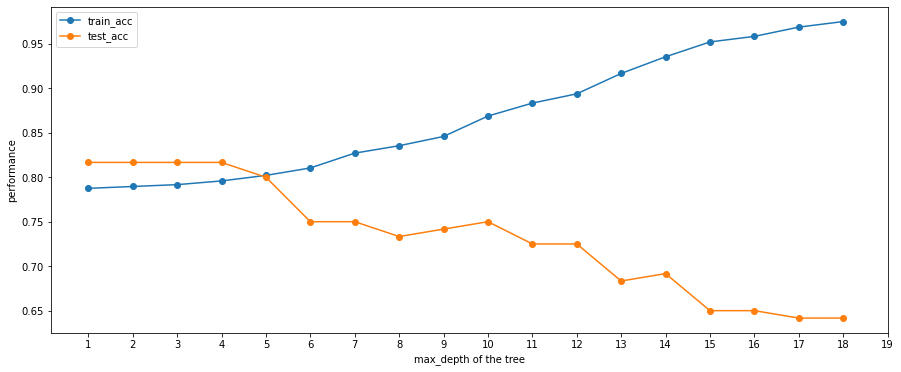

In [130]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_depth'],data['train_acc'], marker = 'o')
plt.plot(data['max_depth'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,20))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

__Taking 10 as the max_depth for decision tree.__  

# Final model

In [131]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(xtrain, ytrain)
y_pred=model.predict(xtest)

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.8

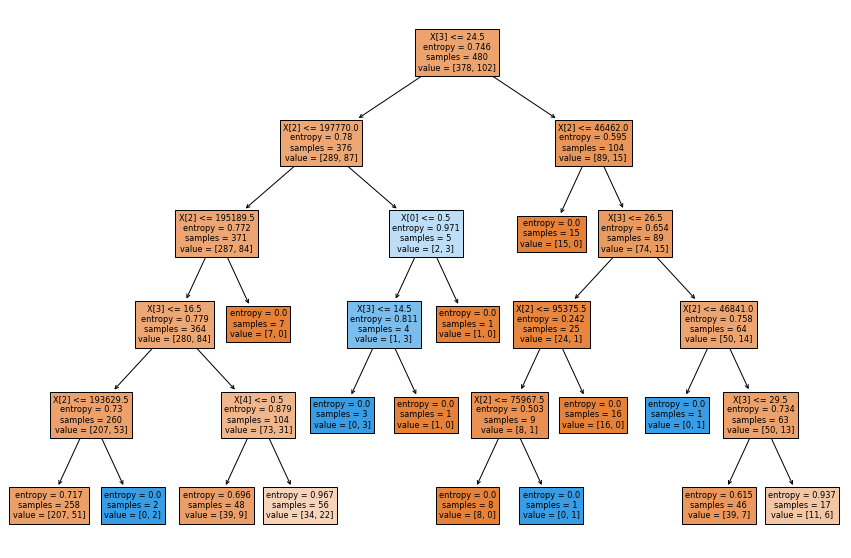

In [133]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True);

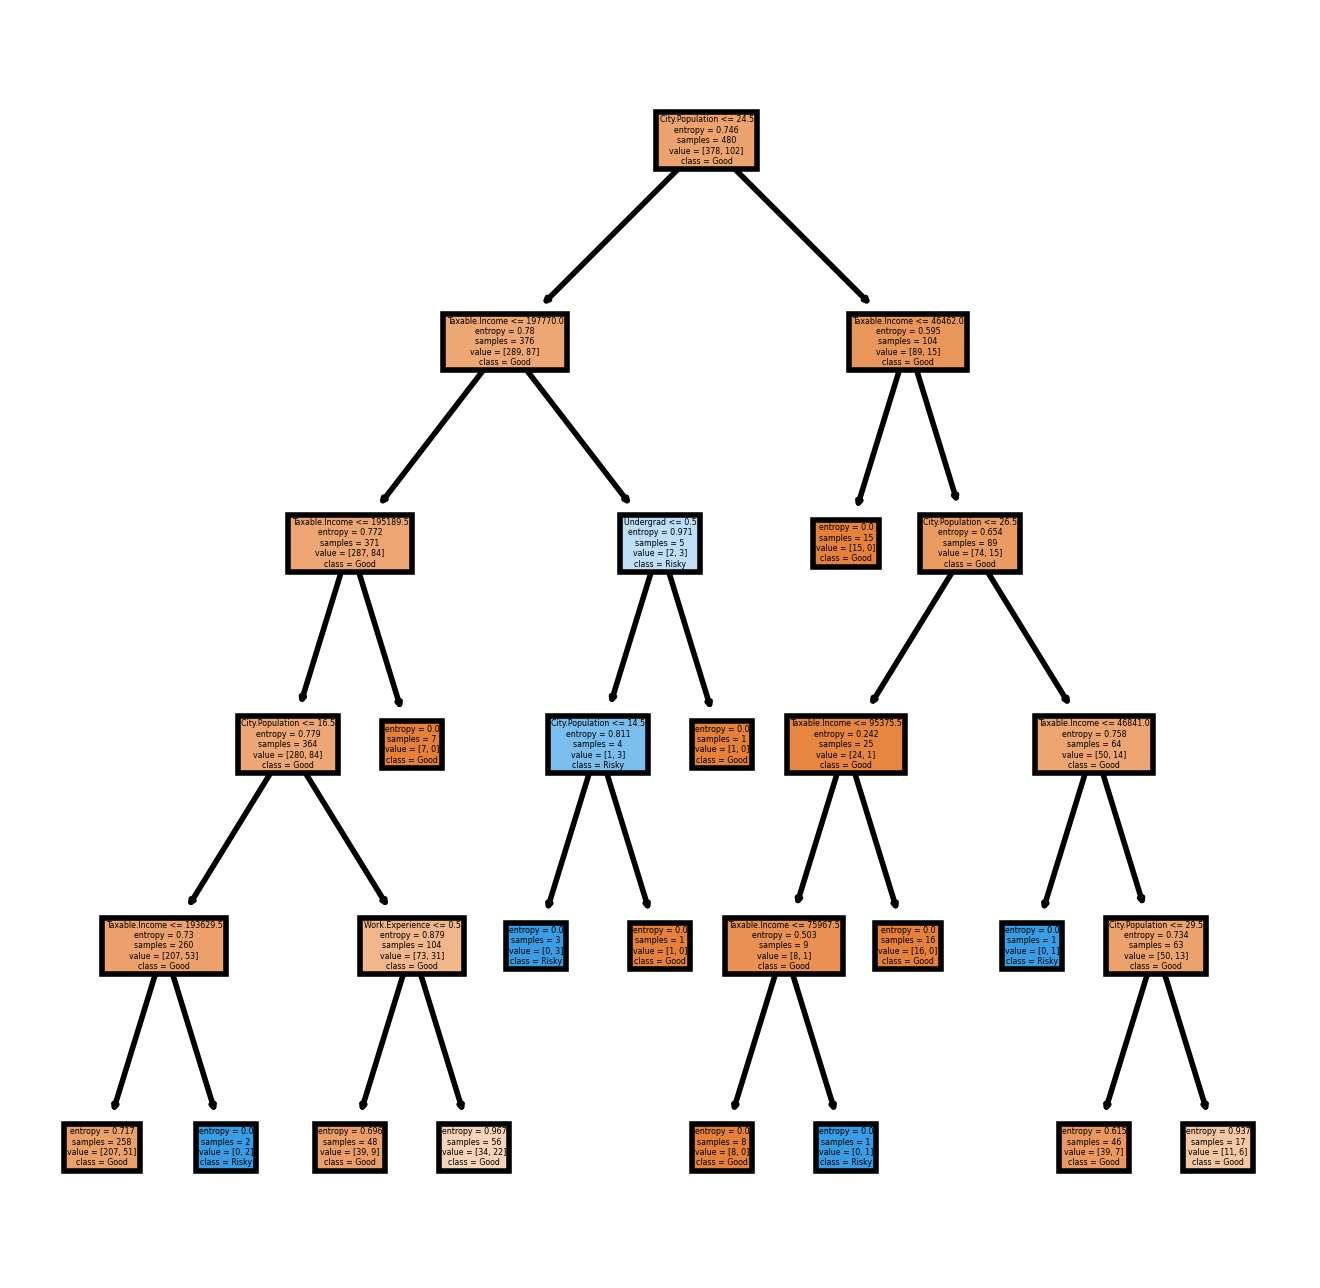

In [134]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience', 'Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [135]:
pd.crosstab(ytest,y_pred)

col_0,0,1
Taxable.Income,,
0,96,2
1,22,0


In [136]:
# Accuracy 
np.mean(y_pred==ytest)

0.8